## アフィン変換（拡大縮小）

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def affine(img, a, b, c, d, tx, ty):
    H, W, C = img.shape
    
    # temporary image
    img = np.zeros((H+2, W+2, C), dtype=np.float32)
    img[1:H+1, 1:W+1] = _img
    #周りに0パディングしたimgを作成した
    
    # get new image shape
    # 何故aとdで変換後の形が出てくるのかがわからい
    # 今回は平行移動で、拡大縮小はしない→aは１、dは１
    H_new = np.round(H*d).astype(np.int)
    W_new = np.round(W*a).astype(np.int)
    out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)
    
    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)
    
    # get position of original image by affine
    # 新しい画像の座標から、元の画像の座標を求める
    abcd = a*d - b*c
    x = np.round((d*x_new - b*y_new)/abcd).astype(np.int) - tx + 1
    y = np.round((-c*x_new + a*y_new)/abcd).astype(np.int) -ty +1
    
    # これがなんのなめに必要かわからない
    x = np.minimum(np.maximum(x,0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y,0), H+1).astype(np.int)
    print(type(y))
    print(y.shape)

    # assgin pixcel to new image
    # これの書き方がいまいちわかっていない
    out[y_new, x_new] =img[y,x]
    
    out = out[:H_new, :W_new]
    out = out.astype(np.uint8)
    
    return out




<class 'numpy.ndarray'>
(102, 166)


True

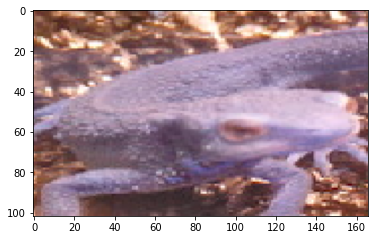

In [4]:
# read image
_img = cv2.imread('../imori.jpg').astype(np.float32)

# affine
out = affine(_img, a=1.3, b=0, c=0, d=0.8, tx=0, ty=0)

# show image
plt.imshow(out)
# save image
cv2.imwrite('out29_1.jpg', out)

<class 'numpy.ndarray'>
(102, 166)


True

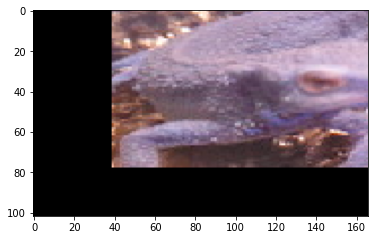

In [5]:
out = affine(_img, a=1.3, b=0, c=0, d=0.8, tx=30, ty=-30)

# show image
plt.imshow(out)
# save image
cv2.imwrite('out29_2.jpg', out)